In [1]:
# import numpy as np
# import cv2

# # Video settings
# width, height = 800, 600
# fps = 30
# duration = 10  # seconds
# background = np.ones((height, width, 3), dtype=np.uint8) * 255

# # Ball settings
# class Ball:
#     def __init__(self, x, y, vx, vy, radius):
#         self.x = x
#         self.y = y
#         self.vx = vx
#         self.vy = vy
#         self.radius = radius

# # Set the same speed for both balls and increase the speed
# speed = 10
# ball1 = Ball(200, 300, speed, speed, 30)
# ball2 = Ball(600, 300, speed, speed, 30)

# # Create video writer
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter('collision.mp4', fourcc, fps, (width, height))

# collision_count = 0

# # Animation loop
# for frame in range(fps * duration):
#     # Create new frame
#     canvas = background.copy()
    
#     # Update positions
#     ball1.x += ball1.vx
#     ball1.y += ball1.vy
#     ball2.x += ball2.vx
#     ball2.y += ball2.vy
    
#     # Check collision with walls for ball1
#     if ball1.x - ball1.radius <= 0 or ball1.x + ball1.radius >= width:
#         ball1.vx = -ball1.vx
#     if ball1.y - ball1.radius <= 0 or ball1.y + ball1.radius >= height:
#         ball1.vy = -ball1.vy
    
#     # Check collision with walls for ball2
#     if ball2.x - ball2.radius <= 0 or ball2.x + ball2.radius >= width:
#         ball2.vx = -ball2.vx
#     if ball2.y - ball2.radius <= 0 or ball2.y + ball2.radius >= height:
#         ball2.vy = -ball2.vy
    
#     # Check collision between balls
#     dx = ball2.x - ball1.x
#     dy = ball2.y - ball1.y
#     distance = np.sqrt(dx*dx + dy*dy)
    
#     if distance <= (ball1.radius + ball2.radius):
#         # Simple elastic collision
#         ball1.vx, ball2.vx = ball2.vx, ball1.vx
#         ball1.vy, ball2.vy = ball2.vy, ball1.vy
#         collision_count += 1
    
#     # Draw balls
#     cv2.circle(canvas, (int(ball1.x), int(ball1.y)), ball1.radius, (0,0,0), -1)
#     cv2.circle(canvas, (int(ball2.x), int(ball2.y)), ball2.radius, (0,0,0), -1)
    
#     # Write frame
#     out.write(canvas)

#     if collision_count >= 3:
#         # cho nó chuyển động 1 tý nữa rồi mới dừng
#         for i in range(10):
#             # Create new frame
#             canvas = background.copy()
            
#             # Update positions
#             ball1.x += ball1.vx
#             ball1.y += ball1.vy
#             ball2.x += ball2.vx
#             ball2.y += ball2.vy
            
#             # Check collision with walls for ball1
#             if ball1.x - ball1.radius <= 0 or ball1.x + ball1.radius >= width:
#                 ball1.vx = -ball1.vx
#             if ball1.y - ball1.radius <= 0 or ball1.y + ball1.radius >= height:
#                 ball1.vy = -ball1.vy
            
#             # Check collision with walls for ball2
#             if ball2.x - ball2.radius <= 0 or ball2.x + ball2.radius >= width:
#                 ball2.vx = -ball2.vx
#             if ball2.y - ball2.radius <= 0 or ball2.y + ball2.radius >= height:
#                 ball2.vy = -ball2.vy
            
#             # Check collision between balls
#             dx = ball2.x - ball1.x
#             dy = ball2.y - ball1.y
#             distance = np.sqrt(dx*dx + dy*dy)
            
#             if distance <= (ball1.radius + ball2.radius):
#                 # Simple elastic collision
#                 ball1.vx, ball2.vx = ball2.vx, ball1.vx
#                 ball1.vy, ball2.vy = ball2.vy, ball1.vy
            
#             # Draw balls
#             cv2.circle(canvas, (int(ball1.x), int(ball1.y)), ball1.radius, (0,0,0), -1)
#             cv2.circle(canvas, (int(ball2.x), int(ball2.y)), ball2.radius, (0,0,0), -1)
            
#             # Write frame
#             out.write(canvas)
#         break

# # Release video writer
# out.release()
# print("Video saved as collision.mp4")

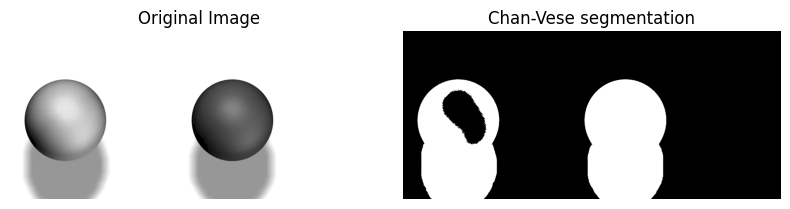

In [4]:
import matplotlib.pyplot as plt
from skimage.segmentation import chan_vese
import cv2
import numpy as np

image = cv2.imread(r'C:\Users\Admin\Desktop\python\CS-K49-IPCV_LAB\object.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)


# Áp dụng phương pháp Chan-Vese để phân đoạn ảnh
cv_result = chan_vese(image, mu=0, lambda1=20, lambda2=20, tol=1e-3, max_num_iter=20)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image")

ax[1].imshow(cv_result, cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation"
ax[1].set_title(title)

fig.tight_layout()
plt.show()


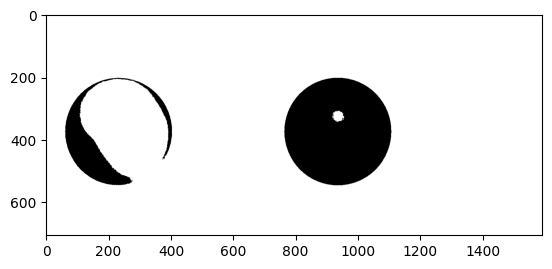

In [3]:
import matplotlib.pyplot as plt
plt.imshow(binary_image, cmap="gray")

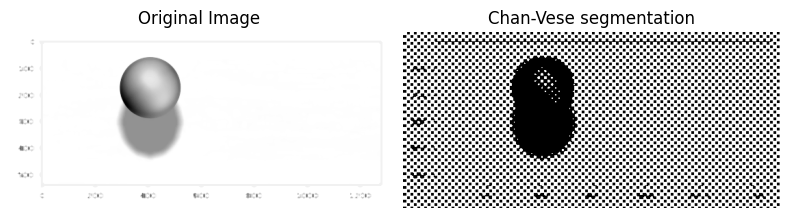

In [25]:
import matplotlib.pyplot as plt
from skimage.segmentation import chan_vese
import cv2
import numpy as np

image = cv2.imread(r'C:\Users\Admin\Desktop\python\CS-K49-IPCV_LAB\output.png', cv2.IMREAD_GRAYSCALE)

image = cv2.medianBlur(image, 5)

cv_result = chan_vese(image, mu=1, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=50)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image")

ax[1].imshow(cv_result, cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation"
ax[1].set_title(title)

fig.tight_layout()
plt.show()


Number of contours: 1


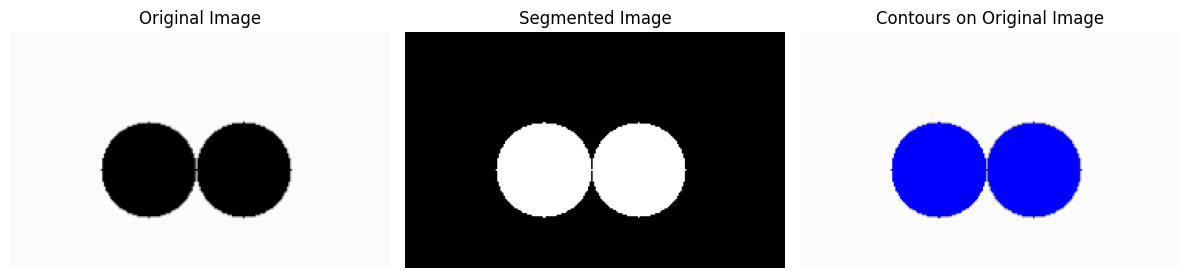

Contours touch each other.


In [26]:
# Import necessary libraries
import matplotlib.pyplot as plt
import cv2
from skimage.segmentation import chan_vese
from skimage.measure import label

# Load an example image
image = cv2.imread(r'C:\Users\Admin\Desktop\python\CS-K49-IPCV_LAB\Capture.PNG', cv2.IMREAD_GRAYSCALE)

# Apply Chan-Vese segmentation
cv_result = chan_vese(image, mu=0.5, lambda1=10, lambda2=10, tol=1e-3, max_num_iter=13, extended_output=True)

# Extract the level set function
phi = cv_result[1]

# Create a binary mask where the level set function is zero (the contour)
contour_mask = phi>1

# Convert the original image to BGR
image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw the contour on the original image
image_bgr[contour_mask] = [0, 0, 255]  # Blue color

# Check if contours touch each other
labeled_contours, num_features = label(contour_mask, return_num=True)
print("Number of contours:", num_features)
# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(cv_result[0], cmap="gray")
ax[1].set_title("Segmented Image")

ax[2].imshow(image_bgr)
ax[2].set_title("Contours on Original Image")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()

# Print the result
if num_features > 1:
    print("Va chạm")
else:
    print("Không va chạm")

In [18]:
import cv2
import numpy as np
from skimage.segmentation import chan_vese
from skimage.measure import label

# Đường dẫn tới video
video_path = r'C:\Users\Admin\Desktop\python\CS-K49-IPCV_LAB\video1.mp4'

# Đọc video
cap = cv2.VideoCapture(video_path)

# Kiểm tra xem video có mở được không
if not cap.isOpened():
    print("Không thể mở video.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Chuyển khung hình sang grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Áp dụng Chan-Vese segmentation
    cv_result = chan_vese(gray_frame, mu=0.25, lambda1=30, lambda2=30, tol=1e-2, max_num_iter=8, extended_output=True)

    # Trích xuất level set function
    phi = cv_result[1]

    # Tạo mặt nạ nhị phân từ level set function
    contour_mask = phi > 1
    
    # Gắn nhãn các vùng contour
    labeled_contours, num_features = label(contour_mask, return_num=True)
    print(num_features)
    
    # Kiểm tra nếu các vật thể chạm nhau
    if num_features == 1:  # Khi các vật thể chạm nhau
        cv2.putText(frame, "Va cham", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    else:  # Khi các vật thể không chạm nhau
        cv2.putText(frame, "Khong va cham", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Hiển thị khung hình đã xử lý
    cv2.imshow("Processed Video", frame)
    
    # Nhấn 'q' để thoát
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Giải phóng tài nguyên
cap.release()
cv2.destroyAllWindows()

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
